In [ ]:
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data/shopping_trends_updated.csv')

df = df.sample(500)

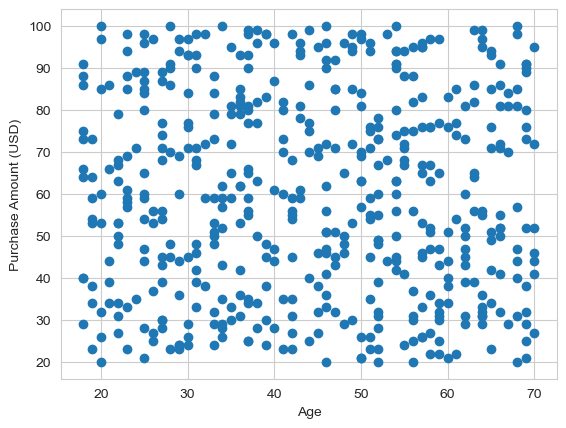

In [2]:
plt.scatter(df['Age'], df['Purchase Amount (USD)'])

plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')

plt.show()

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

df[['age_t', 'amount_t']] = Scaler.fit_transform(df[['Age', 'Purchase Amount (USD)']])

In [4]:
def find_k(df, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    plt.title("Elbow Method")
    plt.plot(means, inertias)
    plt.show()

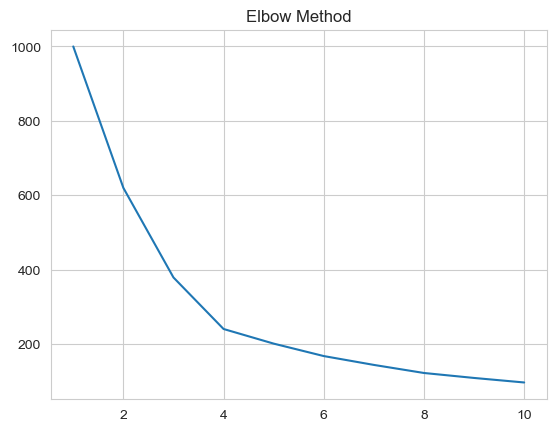

In [5]:
find_k(df[['age_t', 'amount_t']],10)

In [6]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df[['Age', 'Purchase Amount (USD)']])

df['label'] = kmeans.labels_

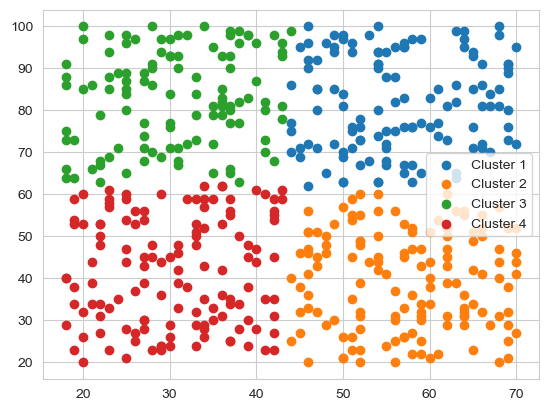

In [8]:
fig, ax = plt.subplots()

for i in range(0, 4):
    cluster = df[df['label'] == i]
    ax.scatter(cluster['Age'], cluster['Purchase Amount (USD)'], label=f"Cluster {i + 1}")
    
plt.legend()
plt.show()

In [ ]:
import unittest

class Testing(unittest.TestCase):